In [11]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt 



import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [12]:
# load FIFA21 dataset
fifa_df= pd.read_csv("fifa21_male2.csv")


C:\software-da\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
pd.set_option('display.max_columns', None)# diaplay maximum number of column


In [14]:
#Data exploration:

In [15]:
fifa_df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [16]:
fifa_df.shape

(17125, 107)

In [17]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [18]:
fifa_df.dtypes

ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object

In [19]:
fifa_df.duplicated()# check duplicate records(rows) in a DataFrame based on all

0        False
1        False
2        False
3        False
4        False
         ...  
17120    False
17121    False
17122    False
17123    False
17124    False
Length: 17125, dtype: bool

In [20]:
list(fifa_df.columns)


['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 

In [64]:
fifa_df[['Name','Value']].sort_values(by='Value',ascending=False).head(10)



,Name,Value
5285,R. Haps,€9M
11082,F. Coman,€9M
6741,M. Borja,€9M
9229,Ayrton,€9M
1186,D. Sturridge,€9M
4384,R. Ruidíaz,€9M
4805,J. Lukaku,€9M
7215,B. Mensah,€9M
3227,N. Lodeiro,€9M
2040,J. King,€9M


In [22]:
fifa_df[['Value']].dtypes

Value    object
dtype: object

In [23]:
fifa_df['Value']

0        €625K
1        €600K
2        €1.1M
3           €0
4        €5.5M
         ...  
17120    €550K
17121    €130K
17122    €130K
17123    €475K
17124    €325K
Name: Value, Length: 17125, dtype: object

In [24]:
fifa_df[['Value']].dtypes

Value    object
dtype: object

In [25]:
fifa_df.describe()  #no variance() -> low information Here OVA,BOV,POT have low variance. But we 

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17118.000000,17118.000000,17067.000000,17125.000000,16702.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,60.507620,45.005742,266.607591,57.846423,49.574676,44.387270,54.324321,60.642803,322.693664,65.445898,65.443036,64.602273,62.924847,64.715591,302.414774,59.711416,65.170212,63.309606,65.308555,49.135708,261.922803,56.997839,47.085582,52.372766,55.443605,50.251445,59.940965,141.469898,47.246949,48.279358,46.099725,77.609693,15.600467,15.484672,15.472058,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,13.960635,17.729483,76.809344,18.047250,18.188344,17.504128,14.856911,15.873647,54.933593,14.657889,14.437377,14.372443,9.037279,14.031563,49.380576,13.417931,11.918063,15.313272,12.627212,19.044862,62.913935,17.021619,20.846705,19.094432,13.730080,15.696363,11.751111,61.595180,20.182548,21.483597,21.185154,81.136603,16.828637,16.143679,15.997328,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,7.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,12.000000,11.000000,14.000000,24.000000,17.000000,128.000000,12.000000,22.000000,11.000000,16.000000,4.000000,50.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,17.000000,3.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,294.000000,58.000000,59.000000,57.000000,57.000000,57.000000,272.000000,50.000000,58.000000,56.000000,58.000000,35.000000,235.000000,45.000000,26.000000,43.000000,47.000000,40.000000,53.000000,84.000000,29.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,63.000000,46.000000,279.000000,63.000000,51.000000,43.000000,57.000000,64.000000,331.000000,68.000000,68.000000,67.000000,63.000000,67.000000,308.000000,61.000000,66.000000,66.000000,67.000000,53.000000,269.000000,60.000000,53.000000,57.000000,57.000000,51.000000,61.000000,158.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66

In [26]:
fifa_df.corr()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
ID,1.000000,-0.743844,-0.431079,-0.385713,0.042604,0.553757,-0.178002,-0.152858,-0.110723,-0.148036,-0.173987,-0.207462,-0.175488,-0.061919,-0.200482,-0.232269,-0.215201,-0.134706,0.062316,0.167381,0.170565,0.019658,-0.421033,0.039317,-0.224439,-0.279340,-0.145467,0.014947,-0.246480,-0.185208,-0.246674,-0.223598,-0.157559,-0.127911,-0.247664,-0.218133,-0.423060,-0.070775,-0.106629,-0.073895,-0.056243,-0.095273,-0.089003,-0.100717,-0.122380,-0.106509,-0.094745,-0.236634,-0.339341,0.175293,-0.284713,-0.366366,-0.232583,-0.165248,-0.295857
Age,-0.743844,1.000000,0.517099,0.456734,-0.237619,-0.850204,0.183954,0.151022,0.105311,0.172793,0.176786,0.187794,0.168876,0.039607,0.181021,0.223884,0.223088,0.121097,-0.055642,-0.186610,-0.180717,-0.041488,0.501010,-0.085861,0.310459,0.304947,0.197371,0.069741,0.350439,0.190803,0.272976,0.276063,0.192996,0.122566,0.236343,0.198917,0.421126,0.114796,0.155497,0.106178,0.086021,0.125933,0.120891,0.125251,0.130810,0.134369,0.121822,0.280383,0.414897,-0.177291,0.309438,0.396082,0.241027,0.223184,0.436462
OVA,-0.431079,0.517099,1.000000,0.985877,0.592268,-0.595585,0.431238,0.386334,0.304012,0.305553,0.492372,0.362712,0.441689,0.350249,0.399299,0.369278,0.482655,0.431284,0.302267,0.143928,0.153476,0.227253,0.870084,0.100938,0.546417,0.534829,0.259915,0.335108,0.338347,0.390849,0.495097,0.382813,0.305286,0.339838,0.507683,0.317666,0.706141,0.248247,0.290071,0.237478,0.209961,0.038222,0.037851,0.037993,0.038650,0.044653,0.037284,0.607676,0.832618,0.201319,0.487060,0.699229,0.643427,0.344906,0.543354
BOV,-0.385713,0.456734,0.985877,1.000000,0.628323,-0.542890,0.464329,0.400046,0.336488,0.335677,0.533046,0.388301,0.473888,0.388163,0.419413,0.387289,0.515422,0.471454,0.335011,0.179547,0.189491,0.256046,0.870157,0.128361,0.572275,0.550932,0.264297,0.368788,0.335436,0.419660,0.523526,0.400031,0.320034,0.368287,0.530160,0.340311,0.721989,0.267770,0.309674,0.257583,0.228406,-0.008702,-0.008851,-0.008312,-0.006124,-0.000933,-0.008819,0.635037,0.830127,0.212889,0.478573,0.689975,0.640746,0.349906,0.535579
POT,0.042604,-0.237619,0.592268,0.628323,1.000000,0.294499,0.233866,0.210944,0.173281,0.137199,0.318544,0.177787,0.265503,0.264651,0.221502,0.166233,0.283647,0.292414,0.258243,0.197884,0.197396,0.190508,0.471139,0.132298,0.221586,0.266902,0.076414,0.170122,0.030991,0.191780,0.243646,0.139444,0.143810,0.191976,0.306404,0.147044,0.369826,0.138748,0.147320,0.138787,0.129735,-0.007277,-0.005874,-0.005240,-0.002734,-0.004015,-0.005215,0.329178,0.474763,0.259294,0.244481,0.395773,0.445004,0.170562,0.159959
Growth,0.553757,-0.850204,-0.595585,-0.542890,0.294499,1.000000,-0.278316,-0.247910,-0.187820,-0.225620,-0.266404,-0.252209,-0.259171,-0.151568,-0.252074,-0.272256,-0.289670,-0.220001,-0.101046,0.026576,0.014764,-0.079536,-0.562259,0.011971,-0.427168,-0.368246,-0.231306,-0.227850,-0.370401,-0.272371,-0.344307,-0.315017,-0.218619,-0.211575,-0.295917,-0.230172,-0.466145,-0.156108,-0.197168,-0.143297,-0.119390,-0.052589,-0.050750,-0.050286,-0.048566,-0.056963,-0.049419,-0.392559,-0.514210,0.019730,-0.333941,-0.434753,-0.319487,-0.239034,-0.484974
Attacking,-0.178002,0.183954,0.431238,0.464329,0.233866,-0.278316,1.000000,0.843765,0.878467,0.702717,0.881208,0.898365,0.928429,0.914914,0.851879,0.778319,0.729337,0.934966,0.694473,0.594912,0.588417,0.641427,0.444720,0.542422,0.823755,0.710188,0.184580,0.669164,0.134714,0.889374,0.887838,0.526827,0.309037,0.908397,0.720319,0.838585,0.714236,0.313363,0.342181,0.308756,0.

In [27]:
fifa_df1=fifa_df.copy()
fifa_numerics=fifa_df1.select_dtypes(include=np.number)

#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
#fifa_numerics=fifa_df1.select_dtypes(include=numerics)
fifa_numerics.columns
fifa_numerics.shape

(17125, 55)

In [28]:
fifa_catagorical=fifa_df1.select_dtypes(include=object)
fifa_catagorical.columns

Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Player Photo',
       'Club Logo', 'Flag Photo', 'Team & Contract', 'Height', 'Weight',
       'foot', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause',
       'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'GK', 'Gender'],
      dtype='object')

In [29]:
#Data cleaning
fifa_df1['Value']= fifa_df1['Value'].str.strip('€')
fifa_df1['Value']=fifa_df1['Value'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)


In [30]:
fifa_numerics=fifa_df1.select_dtypes(include=np.number)#to update the fifa_numaric dataframe,again have to run this line.
fifa_numerics.columns
fifa_numerics.shape

(17125, 56)

In [31]:
fifa_numerics.isna().sum()  # checking NaN

ID                    0
Age                   0
OVA                   0
BOV                   0
POT                   0
Growth                0
Value                 0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys              58
Skill                 0
Dribbling             0
Curve                58
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility              58
Reactions             0
Balance              58
Power                 0
Shot Power            0
Jumping              58
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions         7
Positioning           7
Vision               58
Penalties             0
Composure           423
Defending             0
Marking               0
Standing Tackle       0
Sliding Tackle  

In [32]:
fifa_numerics['Composure']=fifa_numerics['Composure'].fillna (fifa_numerics['Composure'].mean())# imputing NaN with mean

C:\Users\suparna\AppData\Local\Temp/ipykernel_4488/2721928597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_numerics['Composure']=fifa_numerics['Composure'].fillna (fifa_numerics['Composure'].mean())# imputing NaN with mean


In [33]:
fifa_numerics.corr()

,ID,Age,OVA,BOV,POT,Growth,Value,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
ID,1.000000,-0.743844,-0.431079,-0.385713,0.042604,0.553757,-0.094638,-0.178002,-0.152858,-0.110723,-0.148036,-0.173987,-0.207462,-0.175488,-0.061919,-0.200482,-0.232269,-0.215201,-0.134706,0.062316,0.167381,0.170565,0.019658,-0.421033,0.039317,-0.224439,-0.279340,-0.145467,0.014947,-0.246480,-0.185208,-0.246674,-0.223598,-0.157559,-0.127911,-0.247664,-0.218133,-0.355753,-0.070775,-0.106629,-0.073895,-0.056243,-0.095273,-0.089003,-0.100717,-0.122380,-0.106509,-0.094745,-0.236634,-0.339341,0.175293,-0.284713,-0.366366,-0.232583,-0.165248,-0.295857
Age,-0.743844,1.000000,0.517099,0.456734,-0.237619,-0.850204,0.095981,0.183954,0.151022,0.105311,0.172793,0.176786,0.187794,0.168876,0.039607,0.181021,0.223884,0.223088,0.121097,-0.055642,-0.186610,-0.180717,-0.041488,0.501010,-0.085861,0.310459,0.304947,0.197371,0.069741,0.350439,0.190803,0.272976,0.276063,0.192996,0.122566,0.236343,0.198917,0.408532,0.114796,0.155497,0.106178,0.086021,0.125933,0.120891,0.125251,0.130810,0.134369,0.121822,0.280383,0.414897,-0.177291,0.309438,0.396082,0.241027,0.223184,0.436462
OVA,-0.431079,0.517099,1.000000,0.985877,0.592268,-0.595585,0.631679,0.431238,0.386334,0.304012,0.305553,0.492372,0.362712,0.441689,0.350249,0.399299,0.369278,0.482655,0.431284,0.302267,0.143928,0.153476,0.227253,0.870084,0.100938,0.546417,0.534829,0.259915,0.335108,0.338347,0.390849,0.495097,0.382813,0.305286,0.339838,0.507683,0.317666,0.693825,0.248247,0.290071,0.237478,0.209961,0.038222,0.037851,0.037993,0.038650,0.044653,0.037284,0.607676,0.832618,0.201319,0.487060,0.699229,0.643427,0.344906,0.543354
BOV,-0.385713,0.456734,0.985877,1.000000,0.628323,-0.542890,0.640818,0.464329,0.400046,0.336488,0.335677,0.533046,0.388301,0.473888,0.388163,0.419413,0.387289,0.515422,0.471454,0.335011,0.179547,0.189491,0.256046,0.870157,0.128361,0.572275,0.550932,0.264297,0.368788,0.335436,0.419660,0.523526,0.400031,0.320034,0.368287,0.530160,0.340311,0.709538,0.267770,0.309674,0.257583,0.228406,-0.008702,-0.008851,-0.008312,-0.006124,-0.000933,-0.008819,0.635037,0.830127,0.212889,0.478573,0.689975,0.640746,0.349906,0.535579
POT,0.042604,-0.237619,0.592268,0.628323,1.000000,0.294499,0.563570,0.233866,0.210944,0.173281,0.137199,0.318544,0.177787,0.265503,0.264651,0.221502,0.166233,0.283647,0.292414,0.258243,0.197884,0.197396,0.190508,0.471139,0.132298,0.221586,0.266902,0.076414,0.170122,0.030991,0.191780,0.243646,0.139444,0.143810,0.191976,0.306404,0.147044,0.362535,0.138748,0.147320,0.138787,0.129735,-0.007277,-0.005874,-0.005240,-0.002734,-0.004015,-0.005215,0.329178,0.474763,0.259294,0.244481,0.395773,0.445004,0.170562,0.159959
Growth,0.553757,-0.850204,-0.595585,-0.542890,0.294499,1.000000,-0.187347,-0.278316,-0.247910,-0.187820,-0.225620,-0.266404,-0.252209,-0.259171,-0.151568,-0.252074,-0.272256,-0.289670,-0.220001,-0.101046,0.026576,0.014764,-0.079536,-0.562259,0.011971,-0.427168,-0.368246,-0.231306,-0.227850,-0.370401,-0.272371,-0.344307,-0.315017,-0.218619,-0.211575,-0.295917,-0.230172,-0.461480,-0.156108,-0.197168,-0.143297,-0.119390,-0.052589,-0.050750,-0.050286,-0.048566,-0.056963,-0.049419,-0.392559,-0.514210,0.019730,-0.333941,-0.434753,-0.319487,-0.239034,-0.484974
Value,-0.094638,0.095981,0.631679,0.640818,0.563570,-0.187347,1.000000,0.289886,0.249098,0.231430,0.167476,0.327682,0.255451,0.300469,0.260361,0.274536,0.233665,0.306740,0.294168,0.263764,0.163262,0.168164,0.189814,0.559096,0.120276,0.329969,0.334645,0.132739,0.229810,0.135754,0.256569,0.306257,0.189843,0.15059

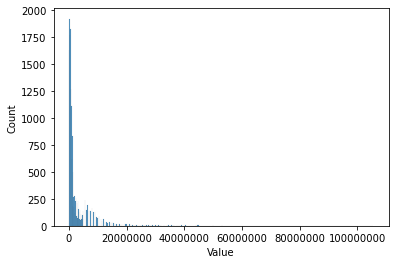

In [34]:
#Data exploration:
#Most players have a low value
sns.histplot(fifa_df1, x='Value')
plt.ticklabel_format(style='plain', axis='x')

In [35]:
#fifa_numerics.corr()[['Value']]
fifa_numerics.corr()[['Value']].sort_values(by='Value',ascending=False).head(10)

,Value
Value,1.000000
BOV,0.640818
OVA,0.631679
POT,0.563570
Reactions,0.559096
Base Stats,0.526843
Composure,0.446343
PAS,0.444484
DRI,0.442156
Total Stats,0.393043


In [36]:
#fifa_numerics.corr()[['Value','BOV']].sort_values(by='Value',ascending=False).head(10)

In [37]:
attributes = fifa_numerics.drop(fifa_numerics.columns.difference(['BOV','OVA','POT','Reactions','Base Stats','Composure','PAS','DRI']), 1)
attributes

C:\Users\suparna\AppData\Local\Temp/ipykernel_4488/2027217515.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  attributes = fifa_numerics.drop(fifa_numerics.columns.difference(['BOV','OVA','POT','Reactions','Base Stats','Composure','PAS','DRI']), 1)


,OVA,BOV,POT,Reactions,Composure,Base Stats,PAS,DRI
0,69,71,69,69,59.940965,408,70,71
1,71,70,71,65,79.000000,385,73,69
2,71,71,71,59,59.940965,354,76,77
3,68,70,82,55,59.940965,369,66,69
4,81,82,81,75,89.000000,420,85,85
...,...,...,...,...,...,...,...,...
17120,64,66,69,48,46.000000,302,37,48
17121,56,58,66,54,46.000000,319,57,56
17122,56,56,67,59,43.000000,303,44,52
17123,62,62,73,56,54.000000,335,58,59


In [38]:
attributes.isna().sum()

OVA           0
BOV           0
POT           0
Reactions     0
Composure     0
Base Stats    0
PAS           0
DRI           0
dtype: int64

In [39]:
#inspecting 'Composure' 
attributes['Composure'].value_counts(dropna=False)

65.0    667
58.0    632
60.0    625
62.0    624
64.0    608
       ... 
14.0      2
96.0      1
17.0      1
16.0      1
95.0      1
Name: Composure, Length: 85, dtype: int64

In [40]:
#attributes['Composure']=attributes['Composure'].fillna (attributes['Composure'].mean())

In [41]:
#attributes['Composure'].isna().sum()#checking NaN

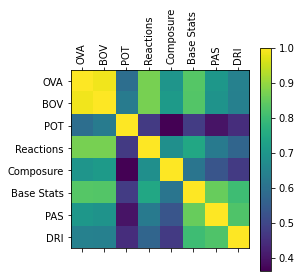

In [42]:
plt.matshow(attributes.corr()) #matshow is a function of matplotlib  is a function of matplotlib 
plt.xticks(range(0,8),attributes.corr().columns,rotation=90)
plt.yticks(range(0,8),attributes.corr().columns)                  #plt.yticks(range(8),attributes.columns)
plt.colorbar()
plt.show()

<AxesSubplot:>

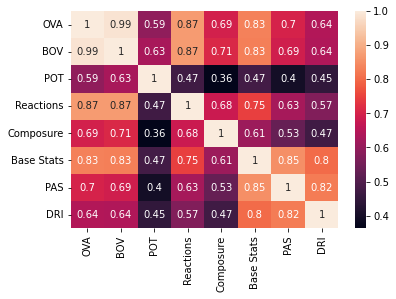

In [43]:
sns.heatmap(attributes.corr(), annot=True)   #using seaborn library



In [44]:
#standardizer = StandardScaler()
#fifa_numerics[['BOV', 'POT','Composure']] = standardizer.fit_transform(fifa_numerics[['BOV', 'POT','Composure']])


In [45]:
fifa_numerics.head()

,ID,Age,OVA,BOV,POT,Growth,Value,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
0,2,33,69,71,69,0,625000,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,71,59,70,71,68,69
1,16,37,71,70,71,0,600000,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,53,69,73,69,58,63
2,27,33,71,71,71,0,1100000,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,45,68,76,77,36,52
3,36,36,68,70,82,14,0,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,59.940965,75,34,41,NaN,68,5,21,64,21,21,1348,369,61,66,66,69,47,60
4,41,36,81,82,81,0,5500000,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,58,70,85,85,63,59


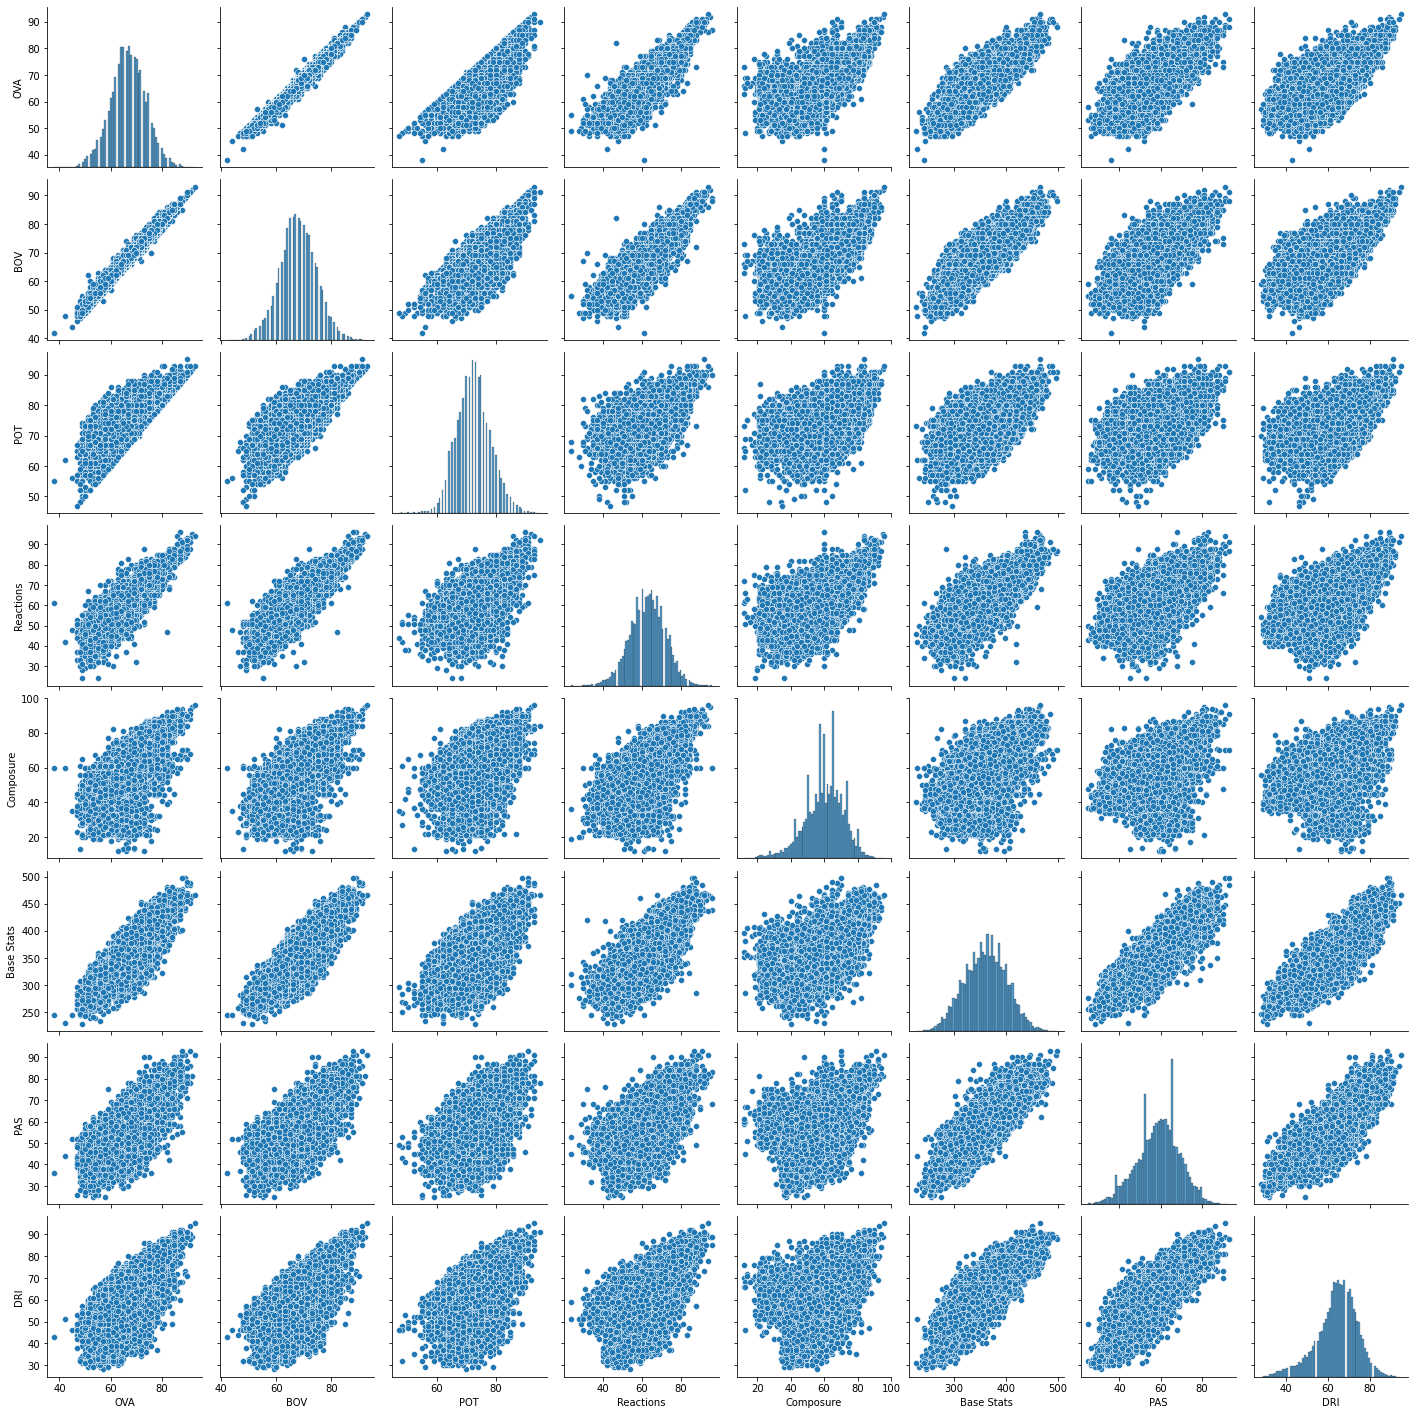

In [46]:
sns.pairplot(attributes)
plt.show()

<AxesSubplot:>

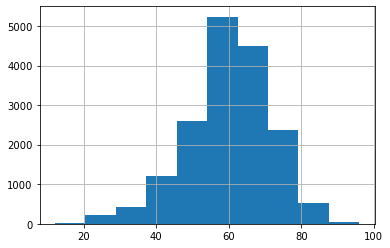

In [47]:
#Composure is another matter, very very spiky behavior
#we expect Composure variable to have some impact, so let's treat it

attributes['Composure'].hist()

<AxesSubplot:>

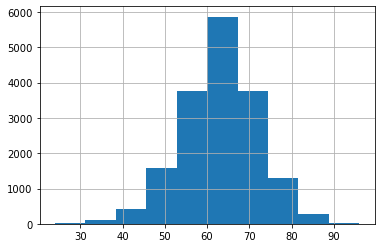

In [48]:
attributes['Reactions'].hist()

<AxesSubplot:>

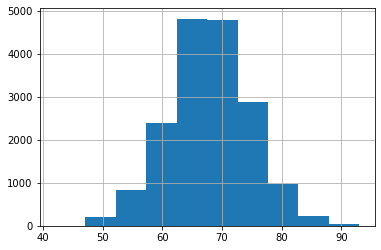

In [49]:
attributes['BOV'].hist()

In [50]:
fifa_numerics['BOV'].unique()

array([71, 70, 82, 66, 77, 78, 75, 81, 87, 67, 76, 73, 69, 79, 74, 72, 64,
       83, 80, 84, 61, 65, 63, 86, 85, 58, 68, 92, 56, 55, 62, 60, 59, 48,
       57, 89, 52, 93, 88, 50, 42, 91, 90, 54, 53, 51, 44, 49, 47, 46],
      dtype=int64)

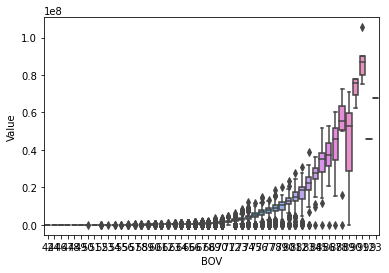

In [51]:
sns.boxplot(x='BOV',y='Value', data = fifa_numerics)
plt.show()

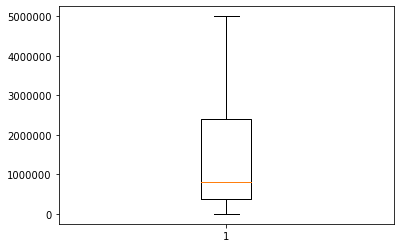

<AxesSubplot:>

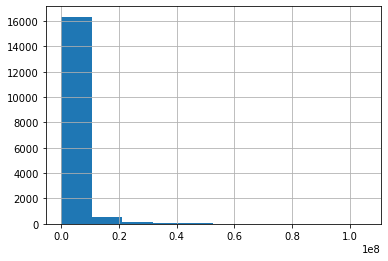

In [52]:
fifa_numerics['Value'].hist()#highly skewed,but we will not tranaform our target variable

In [55]:
fifa_numerics['Value'].duplicated().value_counts() #as most players have a value between 1MM and 5MM

True     16909
False      216
Name: Value, dtype: int64

In [238]:
#a simple normalizer should suffice
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
fifa_numerics[['BOV', 'POT','DRI','Composure']] = normalizer.fit_transform(fifa_numerics[['BOV', 'POT','DRI','Composure']])

C:\software-da\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


<AxesSubplot:>

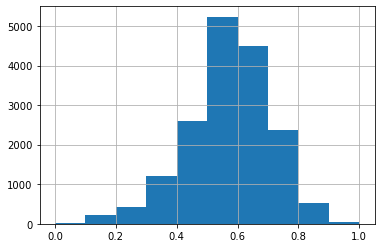

In [248]:
fifa_numerics['Composure'].hist()

In [240]:
#data cleaning

In [241]:
#Let's inspect the insanely correlated "age" and "num calls"

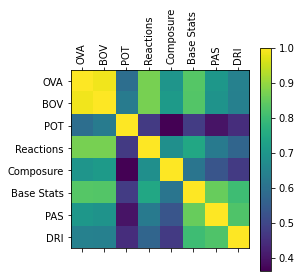

In [61]:
#FIFA 21: EDA and Visualization
plt.matshow(attributes.corr()) #matshow is a function of matplotlib  is a function of matplotlib 
plt.xticks(range(0,8),attributes.corr().columns,rotation=90)
plt.yticks(range(0,8),attributes.corr().columns)                  #plt.yticks(range(8),attributes.columns)
plt.colorbar()
plt.show()

<AxesSubplot:>

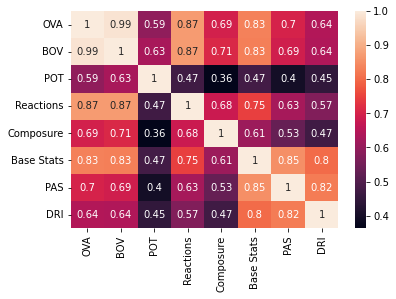

In [62]:
sns.heatmap(attributes.corr(), annot=True)   #using seaborn library



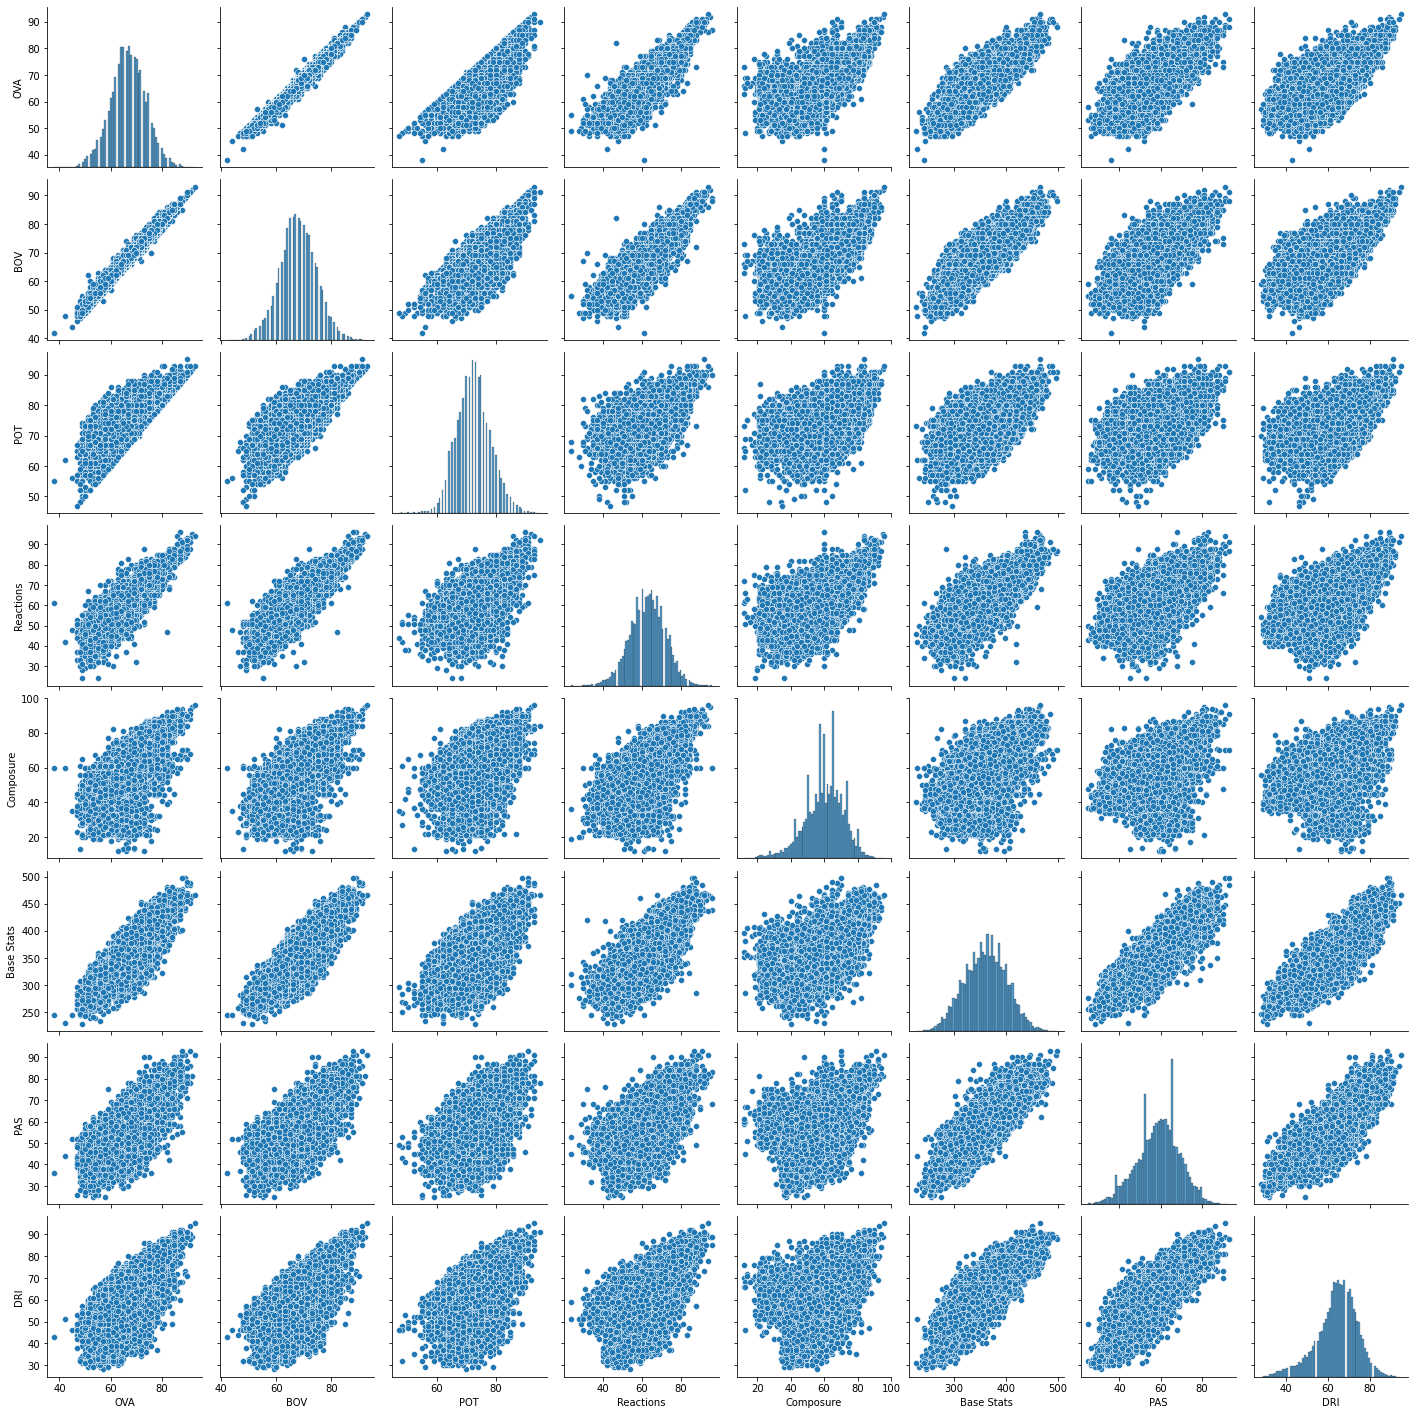

In [63]:
sns.pairplot(attributes)# to show the relationship between pair of variables
plt.show()

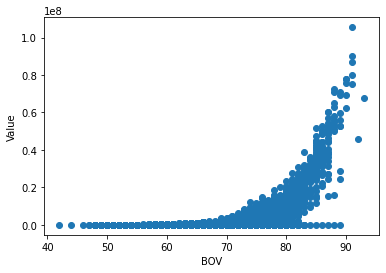

In [58]:

#Q1How does the BOV affect the Value?
# Your code here.
X = fifa_numerics[['BOV']]
y = fifa_numerics['Value']

plt.scatter(X,y)
plt.xlabel('BOV')
plt.ylabel('Value')
plt.show()

<AxesSubplot:xlabel='BOV', ylabel='Count'>

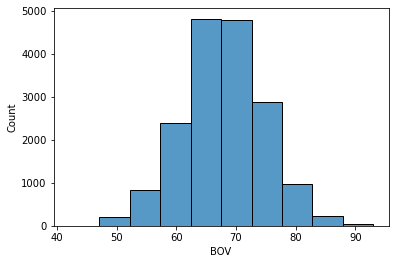

In [59]:
sns.histplot(fifa_numerics.BOV,bins=10)# Its uniformly distributed

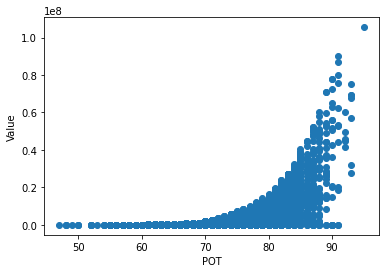

In [60]:
#Q2What is the relation between POT and Value?
X = fifa_numerics[['POT']]
y = fifa_numerics['Value']

plt.scatter(X,y)
plt.xlabel('POT')
plt.ylabel('Value')
plt.show()     #We can observe that the pattern is similar to BOV vs Value.

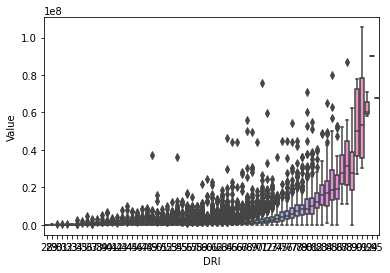

In [65]:
#Q3 Relation between DRI and Value
#We will use a boxplot for this analysis.
sns.boxplot(x='DRI',y='Value', data = fifa_numerics)
plt.show()

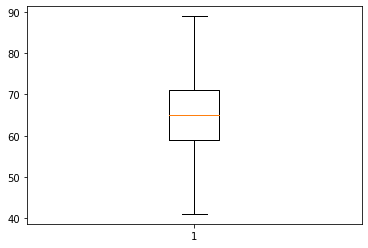

In [71]:
plt.boxplot(fifa_numerics['DRI'],showfliers=False)
plt.ticklabel_format(style='plain', axis='y')

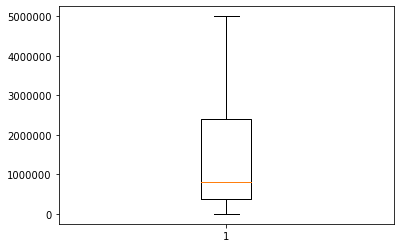

In [70]:
plt.boxplot(fifa_numerics['Value'],showfliers=False)
plt.ticklabel_format(style='plain', axis='y')

In [244]:
#Build the model:
y=fifa_numerics['Value']
X=fifa_numerics[['BOV', 'POT','DRI','Composure']]

In [56]:
y=fifa_numerics['Value']
X=fifa_numerics[['BOV']]

In [57]:
model = linear_model.LinearRegression()
results = model.fit(X,y)
print('R2 is',results.score(X,y))

R2 is 0.4106471954471905
